The core data structure of Keras is a model, a way to organize layers. 

The simplest type of model is the Sequential model, a linear stack of layers.

Source: 
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/#getting-started-30-seconds-to-keras

In [1]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


# Loading Data

there are 768 datapoints with 8 features. Output is a single value for each datapoint


In [2]:
import numpy as np
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape,Y.shape)

(768, 8) (768,)


Stacking layers is as easy as .add():

In [3]:
from keras.layers import Dense

# Dense

Source: https://keras.io/layers/core/

Just your regular densely-connected NN layer.

Dense implements the operation: ```output = activation(dot(input, kernel) + bias)``` where 
- ```activation``` is the element-wise activation function passed as the activation argument, 
- ```kernel``` is a weights matrix created by the layer, and 
- ```bias``` is a bias vector created by the layer (only applicable if use_bias is True).


Syntax:

<code>keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
</code>

**units**: Positive integer, dimensionality of the output space.

**activation**: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

**use_bias**: Boolean, whether the layer uses a bias vector.

**kernel_initializer**: Initializer for the kernel weights matrix (see initializers).

**bias_initializer**: Initializer for the bias vector (see initializers).

**kernel_regularizer**: Regularizer function applied to the kernel weights matrix (see regularizer).

**bias_regularizer**: Regularizer function applied to the bias vector (see regularizer).

**activity_regularizer**: Regularizer function applied to the output of the layer (its "activation"). (see regularizer).

**kernel_constraint**: Constraint function applied to the kernel weights matrix (see constraints).

**bias_constraint**: Constraint function applied to the bias vector (see constraints).

In [20]:
model.add(Dense(12, input_dim=8, init='uniform', activation='relu')) 
# Take input of 8 dimensions and output 12 dimensions

model.add(Dense(8, init='uniform', activation='relu'))
# Take input of last layer and output it as 8 dimensions

model.add(Dense(1, init='uniform', activation='sigmoid'))

# Take input of last layer and output as 1 dimension

/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


# Compilation

Before training a model, you need to configure the learning process, which is done via the ```compile``` method. 

It receives three arguments:

An ```optimizer```. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. 

A ```loss``` function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.


A ```list of metrics```. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

In [5]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

# Training

Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the  fit function.

In [6]:
model.fit(X, Y, nb_epoch=150, batch_size=10)

/anaconda3/envs/data_science/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/150
768/768 [==============================] - 0s 336us/step - loss: 0.6719 - acc: 0.6510
Epoch 2/150
768/768 [==============================] - 0s 143us/step - loss: 0.6593 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 143us/step - loss: 0.6495 - acc: 0.6563
Epoch 4/150
768/768 [==============================] - 0s 141us/step - loss: 0.6447 - acc: 0.6549
Epoch 5/150
768/768 [==============================] - 0s 143us/step - loss: 0.6268 - acc: 0.6771
Epoch 6/150
768/768 [==============================] - 0s 148us/step - loss: 0.6184 - acc: 0.6823
Epoch 7/150
768/768 [==============================] - 0s 143us/step - loss: 0.6077 - acc: 0.6875
Epoch 8/150
768/768 [==============================] - 0s 145us/step - loss: 0.5973 - acc: 0.6901
Epoch 9/150
768/768 [==============================] - 0s 145us/step - loss: 0.5977 - acc: 0.6979
Epoch 10/150
768/768 [==============================] - 0s 156us/step - loss: 0.5918 - acc: 0.6797
Epoch 11/150
768/76

768/768 [==============================] - 0s 157us/step - loss: 0.4828 - acc: 0.7682
Epoch 84/150
768/768 [==============================] - 0s 143us/step - loss: 0.4864 - acc: 0.7708
Epoch 85/150
768/768 [==============================] - 0s 147us/step - loss: 0.4825 - acc: 0.7604
Epoch 86/150
768/768 [==============================] - 0s 145us/step - loss: 0.4764 - acc: 0.7734
Epoch 87/150
768/768 [==============================] - 0s 154us/step - loss: 0.4735 - acc: 0.7799
Epoch 88/150
768/768 [==============================] - 0s 160us/step - loss: 0.4812 - acc: 0.7630
Epoch 89/150
768/768 [==============================] - 0s 155us/step - loss: 0.4701 - acc: 0.7799
Epoch 90/150
768/768 [==============================] - 0s 144us/step - loss: 0.4810 - acc: 0.7682
Epoch 91/150
768/768 [==============================] - 0s 150us/step - loss: 0.4711 - acc: 0.7760
Epoch 92/150
768/768 [==============================] - 0s 150us/step - loss: 0.4708 - acc: 0.7695
Epoch 93/150
768/768 [=

In [7]:
# Evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 47us/step
acc: 79.95%


Source : https://keras.io/visualization/

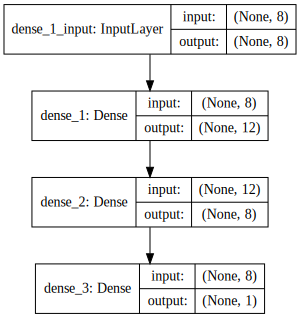

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)